In [ ]:
## CNN(Convolution Neural Network) 이란? : 합성곱 신경망 
## FC Layer(Fully Connected Layer) : 
## 이전 layer의 모든 node가 다음 layer의 모든 perceptron 과 실제로 연결되어서 
## 학습되는 구조 -> 지금까지(사실 37강때 처음으로) 해왔던 신경망들이 해당
## FC Layer를 다른말로 Dense Layer라고도 한다. 

## FC Layer의 특징은 MNIST의 예제처럼 입력데이터가 1차원으로 한정된다. 
## 즉, 각각의 이미지가 1차원으로 표현이 되어야 한다. 
## 그래서 2차원 이미지를 우리가 1차원으로 변환시켜서 사용했던 것
## 우리가 사용한 MNIST예제는 상당히 간단한 이미지 학습(grey형태의 채도 일변도, 예측예제)

## 이미지 학습의 가장 큰 문제는 
## 이미지가 살짝 휘어있거나, 크기가 제각각이거나, 변형이 조금만 되어도 
## 학습이 힘들어진다. 
## 이런 경우에는 training data가 굉장히 많이 필요하고 
## 추가적으로 학습할 때 많은 시간을 요구함 

In [ ]:
## 고민하면서 방법을 연구하기 시작함 -> Canada의 Supervision이란 팀이 실마리를 제공함 
## CNN을 최초 제시하면서 오차율을 큰 폭으로 줄임 -> 지금은 사람보다 정확한 경지 
## CNN은 사람이 학습하는 방식을 모델링 
## 사람은 대상이 변형이 있어도 사진을 보고 누군가의 사진임을 알 수 있다.(특징을 인지)
## (물론 너무 속이면 못알아볼 수 도 있다.-> 마찬가지로 왜곡되지 않는 특징 추출)

## mnist가 특정 사진을 픽셀단위로 핀다음 한번만 학습했다면, 
## CNN은 여러가지 필터를 적용해서 사진을 다른 형태로 변형한 후 
## 도드라진 특징을 가지고 한 이미지를 여러번 학습(Photoshop 의 shapen) 
## → 이미지를 대표하는 특징을 도출해서 신경망에 여러개 넣어서 학습하는 방식(convolution)

## 1장의 컬러사진은 width, length, color(depth) 3차원으로 표현 
## 여기서 여러장의 사진이 사용되기 때문에 입력데이터를 총 '4차원' 으로 표현 

## 실제 이미지 1장은 3차원이고 이놈을 flatten 시켜서 1차원으로 표현해야 한다. 
## 크기를 조절해야 하기 때문에 공간에 대한 데이터를 유실할 우려가 있음 
## 이런 데이터 유실 때문에 학습과 예측에 문제가 발생하게된다.

## '공간데이터의 유실을 없애고 이미지의 특성을 추출해서 학습이 용이하게 만드는 방식'
## => CNN

## 랜덤크기의 필터(kernel)를 하나 만들고 3차원 이미지 데이터에 적용 -> 당연히 필터도 3차원 
## mnist의 depth는 원본의 depth 와 똑같아야 했던 것처럼. (grey 1개)
## 이 필터 표현 방식을 channel 이라고 지칭(일반적으로 3 channel, 흑백사진은 1 channel)
## 행렬곱을 통해서 결과를 도출 (convolution map)
## 원본데이터의 사이즈는줄더라도 작은 이미지의 많은 수로 형성되게 됨 
## 여러가지 feature map이 모이면 activation map 이라고 함. 
## kernal, channel, feature map,activation map, strider

In [ ]:
## Code로 알아봅시당 
## 사용되어 지는 함수부터 알아보자
## Sample CNN

import tensorflow as tf 
import numpy as np 

#입력데이터의 형식 : 3*3*1 (width * height * color(색이 1이면 gray scale))
#입력 데이터 => (이미지개수,width,height,color) = (1,3,3,1) #총 4차원 
# 총 9개의 데이터가 사용(1~9)

image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]],
                   [[7],[8],[9]]]], dtype=np.float32)

print("image의 shape : {}".format(image.shape)) #(1,3,3,1)

# Activation map을 위한 filter를 정의(width.height.color.filter개수)
# filter(2,2,1,3) : 2행 2열 1컬러 3개
weight = np.array([[[[1,10,-1]],[[1,10,-1]]],[[[1,10,-1]],[[1,10,-1]]]])
print("weight의 shape : {}".format(weight.shape)) #(2, 2, 1, 3)

## convolution latyer
# stride = 1 :가로, 세로를 1씩 움직인다 
conv2d = tf.nn.conv2d(image,weight,strides=[1,1,1,1], padding = "VALID" ) 
#4차원이므로 stride 형태를 맞추어주어야 한다.
#처음과 맨끝은 더미(형태 맞춰주기 위한 쩌리), 핵심은 가운데 2개 
# 패딩 설정도 가능하다 (여기선 처리 안하고 알아서 줄일거)
print("conv2d의 shape : {}".format(conv2d.shape)) #(1, 2, 2, 3) 맨앞은 이미지 1장 
sess = tf.Session()
conv2d = sess.run(conv2d) #실행결과 numpy array로 

## pooling layer
pool = tf.nn.max_pool(conv2d, ksize = [1,2,2,1], 
                      strides = [1,1,1,1], 
                      padding = "SAME")
#kernel사이즈 결정 (2x2),나머지 더미
#stride는 한칸씩 
#원본크기와 padding size 동일하게 
print("pool의 shape : {}".format(pool.shape)) #(1,2,2,3), conv2d와 동일 


In [ ]:
## tf 내장 MNIST 사용
## Convolution 결과 이미지가 원본이미지에 비해 어떻게 다른지 눈으로 확인해보자 
import tensorflow as tf 
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt 

#Data Loading 
mnist = input_data.read_data_sets("./data/mnist", one_hot=True)
img = mnist.train.images[0].reshape(28,28)
plt.imshow(img, cmap="Greys")

# 해당 이미지를 Convolution 처리를 해 보아요 
# 입력데이터 -> (이미지개수, width, height, color) -> (1,3,3,1)
img = img.reshape(-1,28,28,1)
print(img.shape) #(1, 28, 28, 1)
W = tf.Variable(tf.random_normal([3,3,1,5]),
                                 name = "filter1") #너비, 높이, 컬러 depth, 개수
conv2d = tf.nn.conv2d(img,W,strides=[1,2,2,1],
                      padding = "SAME") #stride 2칸씩 뒴
print("conv2d의 shape : {}".format(conv2d.shape)) #(1,14,14,5)

# 세션 초기화 
sess = tf.Session()
sess.run(tf.global_variables_initializer())
conv2d = sess.run(conv2d)

# 이미지를 표현하기 위해서 축을 전환 
# numpy 자체 기능 활용
# (1, 14, 14, 5) => (5, 14, 14, 1)
conv2d_img = np.swapaxes(conv2d,0,3) #첫번째랑 네번째 거 바꿈
print("conv2d의 shape : {}".format(conv2d_img.shape)) #(5,14,14,1)
plt.imshow(conv2d_img[0].reshape(14,14), cmap="Greys")

#################################################################################

In [ ]:
## 내장 MNIST 데이터에 CNN 학습을 적용해보자! 
## tensorflow-MNIST with CNN

# module loading
import tensorflow as tf 
import pandas as pd 
import numpy as np 
from tensorflow.examples.tutorials.mnist import input_data

# Data Loading
mnist = input_data.read_data_sets("./data/mnist", one_hot=True)

#Graph 초기화 
tf.reset_default_graph()

#Placeholder 
X = tf.placeholder(shape=[None,784], dtype=tf.float32)
Y = tf.placeholder(shape=[None,10], dtype=tf.float32)
# drop_rate = tf.placeholder(dtype = tf.float32)

# Convolution Layer 
x_img = tf.reshape(X,[-1,28,28,1])
W1 = tf.Variable(tf.random_normal([3,3,1,32]))
L1 = tf.nn.conv2d(x_img,W1,strides=[1,1,1,1],padding="SAME")
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1,ksize=[1,2,2,1], 
                    strides=[1,2,2,1],
                    padding = "SAME") #maxpooling을 통한 사이즈 반토막 (14*14)

# 두번째 C.layer부턴 확 늘려보자 
W2 = tf.Variable(tf.random_normal([3,3,32,64]))
L2 = tf.nn.conv2d(L1,W2,strides=[1,1,1,1],padding="SAME")
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2,ksize=[1,2,2,1], 
                    strides=[1,2,2,1],
                    padding = "SAME") 

################################

## FC Layer
# 만든 데이터를 FC Layer에 넣어서 학습하자(이전에 했던 학습 형태 -> L2가 2차원)
L2 = tf.reshape(L2,[-1,7*7*64])

W3 = tf.get_variable("weight3",shape=[7*7*64, 256],
                     initializer = tf.contrib.layers.xavier_initializer())

#~~
b3 = tf.Variable(tf.random_normal([256]), name = "bias3")      
L3 = tf.sigmoid(tf.matmul(L2,W3) + b3)

W4 = tf.Variable(tf.random_normal([256,10]), name = "weight4") 
b4 = tf.Variable(tf.random_normal([10]), name = "bias4")      

# Hypothesis 
logit = tf.matmul(L3,W4) + b4 
H = tf.nn.softmax(logit) #or tf.sigmoid()

# cost
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logit,
                                                                 labels = Y))

# train(Adam으로)
train = tf.train.AdamOptimizer(learning_rate = 0.01).minimize(cost)
#train = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

# session, 초기화 
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습 
num_of_epoch = 30 
batch_size = 100 

for step in range(num_of_epoch):
    num_of_iter = int(mnist.train.num_examples / batch_size)
    cost_val = 0 # 코스트 초기화(국룰)
    
    for i in range(num_of_iter):
        batch_x,batch_y = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([train,cost], feed_dict={X:batch_x, 
                                                        Y:batch_y})
    if step % 3 == 0 :
        print("Cost는 : {}".format(cost_val))

In [ ]:
predict = tf.argmax(H,1)
correct = tf.equal(predict, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

print("정확도는 : {}".format(sess.run(accuracy, 
                                   feed_dict={X:mnist.test.images, 
                                              Y:mnist.test.labels})))

#################################################################################

In [2]:
## 실제 Kaggle 데이터에 CNN 학습을 적용해보자!
# 필요한 module import
import tensorflow as tf
import pandas as pd
import numpy as np
import warnings 
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings(action = "ignore") # warning 출력 방지 

# Data Loading
mnist = pd.read_csv("./data/digit-recognizer/train.csv")


train_num = int(mnist.shape[0] * 0.8)   
test_num = mnist.shape[0] - train_num

train_data=mnist[:train_num]
test_data=mnist[train_num:]

# train, test data set
train_x_data = mnist.drop("label",axis=1, inplace=False)[:train_num].values
test_x_data = mnist.drop("label",axis=1, inplace=False)[train_num:].values

train_y_data = mnist['label'][:train_num].values
test_y_data = mnist['label'][train_num:].values

# 값이 너무 크니 minmax scale 
scaler= MinMaxScaler()
train_x_data = scaler.fit_transform(train_x_data)
test_x_data = scaler.fit_transform(test_x_data)

# 더미변수로 바꿔주기
train_y_data = pd.get_dummies(train_y_data) 
test_y_data = pd.get_dummies(test_y_data) 

display(train_x_data.shape, train_y_data.shape, 
        test_x_data.shape, test_y_data.shape)

(33600, 784)

(33600, 10)

(8400, 784)

(8400, 10)

In [8]:
#Graph 초기화 
tf.reset_default_graph()

#Placeholder 
X = tf.placeholder(shape=[None,784], dtype=tf.float32)
Y = tf.placeholder(shape=[None,10], dtype=tf.float32)
# drop_rate = tf.placeholder(dtype = tf.float32)

## Convolution Layer
# 1st Convolution Layer 
x_img = tf.reshape(X,[-1,28,28,1])
c_W1 = tf.Variable(tf.random_normal([3,3,1,32]))
c_L1 = tf.nn.conv2d(x_img,c_W1,strides=[1,1,1,1],padding="SAME")
c_L1 = tf.nn.relu(c_L1)
c_L1 = tf.nn.max_pool(c_L1,ksize=[1,2,2,1], 
                    strides=[1,2,2,1],
                    padding = "SAME") #maxpooling을 통한 사이즈 반토막 (14*14)

# 2nd Convolution Layer 
c_W2 = tf.Variable(tf.random_normal([3,3,32,64]))
c_L2 = tf.nn.conv2d(c_L1,c_W2,strides=[1,1,1,1],padding="SAME")
c_L2 = tf.nn.relu(c_L2)
c_L2 = tf.nn.max_pool(c_L2,ksize=[1,2,2,1], 
                      strides=[1,2,2,1], 
                      padding = "SAME") 
'''
# 3rd Convolution Layer 
c_W3 = tf.Variable(tf.random_normal([3,3,64,64]))
c_L3 = tf.nn.conv2d(c_L2,c_W3,strides=[1,1,1,1],padding="SAME")
c_L3 = tf.nn.relu(c_L2)
c_L3 = tf.nn.max_pool(c_L3,ksize=[1,2,2,1], 
                      strides=[1,2,2,1],
                      padding = "SAME") 
################################
'''

'\n# 3rd Convolution Layer \nc_W3 = tf.Variable(tf.random_normal([3,3,64,64]))\nc_L3 = tf.nn.conv2d(c_L2,c_W3,strides=[1,1,1,1],padding="SAME")\nc_L3 = tf.nn.relu(c_L2)\nc_L3 = tf.nn.max_pool(c_L3,ksize=[1,2,2,1], \n                      strides=[1,2,2,1],\n                      padding = "SAME") \n################################\n'

In [9]:
## FC Layer

#Layer 형태 변화(4차원 -> 2차원)
reshaped_Layer = tf.reshape(c_L2,[-1,7*7*64])

#1st Layer(relu사용)
fc_W1 = tf.get_variable("Fully_Connected_Weight1",shape=[7*7*64, 256],
                       initializer = tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]), name = "bias1")
fc_L1 = tf.nn.relu(tf.matmul(reshaped_Layer,fc_W1) + b1)

#2nd Layer
fc_W2 = tf.get_variable("Fully_Connected_Weight2", shape=[256, 256], 
                        initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]), name = "bias2")      
fc_L2 = tf.nn.relu(tf.matmul(fc_L1,fc_W2) + b2)

#3rd Layer
fc_W3 = tf.get_variable("Fully_Connected_Weight3", shape=[256, 36], 
                        initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([36]), name = "bias3")      
fc_L3 = tf.nn.relu(tf.matmul(fc_L2,fc_W3) + b3)

#4th Layer
fc_W4 = tf.get_variable("Fully_Connected_Weight4", shape=[36,10],
                        initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([10]), name = "bias4")

# Hypothesis 
logit = tf.matmul(fc_L3,fc_W4) + b4 
H = tf.nn.softmax(logit) #or tf.sigmoid()

# cost
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logit,
                                                                 labels = Y))

# train(Adam으로)
train = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(cost)
#train = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

# session, 초기화 
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
train_epoch = 30
batch_size = 100

for step in range(train_epoch):
    num_of_iter = int(train_num / batch_size)    
    cost_val = 0
    
    for i in range(num_of_iter):
        batch_x=train_x_data[i*batch_size:(i+1)*batch_size]
        batch_y=train_y_data[i*batch_size:(i+1)*batch_size]
        _,cost_val = sess.run([train,cost],
                             feed_dict={X:batch_x,
                                        Y:batch_y})
    if step % 3 ==0:
        print("Cost값은: {}".format(cost_val))

Cost값은: 0.5784896612167358
Cost값은: 0.0388200581073761
Cost값은: 0.024859758093953133
Cost값은: 0.014755375683307648
Cost값은: 0.012241256423294544
Cost값은: 0.004170374479144812
Cost값은: 0.007692200597375631
Cost값은: 0.1492687463760376
Cost값은: 0.0006811046041548252
Cost값은: 0.028345884755253792


In [11]:
#정확도 측정 

predict = tf.argmax(H,1)
correct = tf.equal(predict, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype = tf.float32))
print("정확도는 : {}".format(sess.run(accuracy, 
                                  feed_dict={X:test_x_data,
                                             Y:test_y_data})))
# 얼마나 학습이 잘 되었는가


정확도는 : 0.9873809814453125


Label : [6]
Predict :[6]


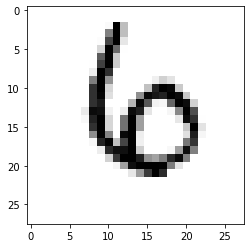

In [15]:
# 직접확인 
r = np.random.randint(0,test_num) # mnist.test.num_examples = 10000
print("Label : {}".format(sess.run(tf.argmax(test_y_data[r:r+1], axis=1))))

print("Predict :{}".format(sess.run(tf.argmax(H,1), 
         feed_dict={X:test_x_data[r:r+1]})))    # 2차원

plt.imshow(test_x_data[r:r+1].reshape(28,28), cmap="Greys")

In [16]:
## 진짜 test 파일로 돌려보자
test_data = pd.read_csv("./data/digit-recognizer/test.csv")

# MinMax scaler가 min, max값 가지고 있다.
prediction_data = scaler.transform(test_data)

#sess.run(H,feed_dict={X:prediction_data})
result = sess.run(tf.argmax(H,1), feed_dict={X:prediction_data})
result

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [17]:
#파일생성
my_df = pd.DataFrame()
my_df["ImageId"] = range(1,test_data.shape[0]+1)
my_df["Label"] = result
my_df

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [18]:
my_df.to_csv("./data/digit-recognizer/mnist_submission.csv",index=False)